In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from error_algorithms import IoU
from error_algorithms import segmentation_accuracy
from SyMBac.misc import misc_load_img
import tifffile
import matplotlib.pyplot as plt
import os
from scipy import ndimage
from PIL import Image

# 100x

int(np.round(np.sqrt(seg.size/(101*np.pi))))

In [3]:
# type: ignore
directory = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/omnipose_SyMBac_TD_fl/100x test"
starlist100 = []
watrlist100 = []
localist100 = []
otsulist100 = []
omnilist100 = []
starlist100_exc = []
watrlist100_exc = []
localist100_exc = []
otsulist100_exc = []
omnilist100_exc = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open(directory+"/masks/test_"+str(i).zfill(5)+"_masks.png"))
    star = np.array(Image.open(directory+"/stardist/test_"+str(i).zfill(5)+"StarDist.tif"))
    water,_ = ndimage.label(tifffile.imread(directory+"/watershed/test_"+str(i).zfill(5)+"watershed.tif"),np.ones([3,3]))
    local,_ = ndimage.label(tifffile.imread(directory+"/bernsen/test_"+str(i).zfill(5)+"bernsen.tif"),np.ones([3,3]))
    otsu,_ = ndimage.label(tifffile.imread(directory+"/otsu/test_"+str(i).zfill(5)+"otsu.tif"),np.ones([3,3]))
    omni = np.array(Image.open(directory+"/omnipose segmentations/mask_"+str(i).zfill(5)+".png"))
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        starj = star[:,width*j:width*(j+1)]
        waterj = water[:,width*j:width*(j+1)]
        localj = local[:,width*j:width*(j+1)]
        otsuj = otsu[:,width*j:width*(j+1)]
        omnij = omni[:,width*j:width*(j+1)]
        outstar,excstar = IoU(maskj,starj)
        outwatr,excwatr = IoU(maskj,waterj)
        outloca,excloca = IoU(maskj,localj)        
        outotsu,excotsu = IoU(maskj,otsuj)
        outomni,excomni = IoU(maskj,omnij)
        starlist100.append(outstar)
        watrlist100.append(outwatr)
        localist100.append(outloca)
        otsulist100.append(outotsu)
        omnilist100.append(outomni)
        starlist100_exc.append(excstar)
        watrlist100_exc.append(excwatr)
        localist100_exc.append(excloca)
        otsulist100_exc.append(excotsu)
        omnilist100_exc.append(excomni)
    # idlist.append(segmentation_accuracy(mask,[star,water,local,otsu],min_dist=mask.shape[1]//5,lb=0.5,ub=1/0.5))

In [4]:
star100 = []
water100 = []
local100 = []
otsu100 = []
omni100 = []
for out in starlist100:
    for a,b in out:
        star100.append(a/b)
for out in watrlist100:
    for a,b in out:
        water100.append(a/b)
for out in localist100:
    for a,b in out:
        local100.append(a/b)
for out in otsulist100:
    for a,b in out:
        otsu100.append(a/b)
for out in omnilist100:
    for a,b in out:
        omni100.append(a/b)

In [5]:
starexc100 = []
watrexc100 = []
locaexc100 = []
otsuexc100 = []
omniexc100 = []
for exc in starlist100_exc:
    starexc100.extend(exc)
starexc100 = np.array(starexc100)
for exc in watrlist100_exc:
    watrexc100.extend(exc)
watrexc100 = np.array(watrexc100)
for exc in localist100_exc:
    locaexc100.extend(exc)
locaexc100 = np.array(locaexc100)
for exc in otsulist100_exc:
    otsuexc100.extend(exc)
otsuexc100 = np.array(otsuexc100)
for exc in omnilist100_exc:
    omniexc100.extend(exc)
omniexc100 = np.array(omniexc100)

In [6]:
star100 = np.array(star100)
watr100 = np.array(water100)
loca100 = np.array(local100)
otsu100 = np.array(otsu100)
omni100 = np.array(omni100)

In [7]:
plotstar100 = np.append(star100,starexc100*0)
plotwatr100 = np.append(watr100,watrexc100*0)
plotloca100 = np.append(loca100,locaexc100*0)
plototsu100 = np.append(otsu100,otsuexc100*0)
plotomni100 = np.append(omni100,omniexc100*0)

In [8]:
print(np.mean(plotstar100))
print(np.mean(plotwatr100))
print(np.mean(plotloca100))
print(np.mean(plototsu100))
print(np.mean(plotomni100))

0.7065018763579491
0.6626521478460801
0.5198222703640487
0.27900093381134544
0.945055948123993


# 60x

In [9]:
directory = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/omnipose_SyMBac_TD_fl/60x test"
starlist60 = []
watrlist60 = []
localist60 = []
otsulist60 = []
omnilist60 = []
starlist60_exc = []
watrlist60_exc = []
localist60_exc = []
otsulist60_exc = []
omnilist60_exc = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open(directory+"/masks/test_"+str(i).zfill(5)+"_masks.png"))
    star = np.array(Image.open(directory+"/stardist/test_"+str(i).zfill(5)+"StarDist.tif"))
    water,_ = ndimage.label(tifffile.imread(directory+"/watershed/test_"+str(i).zfill(5)+"watershed.tif"),np.ones([3,3]))
    local,_ = ndimage.label(tifffile.imread(directory+"/bernsen/test_"+str(i).zfill(5)+"bernsen.tif"),np.ones([3,3]))
    otsu,_ = ndimage.label(tifffile.imread(directory+"/otsu/test_"+str(i).zfill(5)+"otsu.tif"),np.ones([3,3]))
    omni = np.array(Image.open(directory+"/omnipose segmentations/mask_"+str(i).zfill(5)+".png"))
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        starj = star[:,width*j:width*(j+1)]
        waterj = water[:,width*j:width*(j+1)]
        localj = local[:,width*j:width*(j+1)]
        otsuj = otsu[:,width*j:width*(j+1)]
        omnij = omni[:,width*j:width*(j+1)]
        outstar,excstar = IoU(maskj,starj)
        outwatr,excwatr = IoU(maskj,waterj)
        outloca,excloca = IoU(maskj,localj)        
        outotsu,excotsu = IoU(maskj,otsuj)
        outomni,excomni = IoU(maskj,omnij)
        starlist60.append(outstar)
        watrlist60.append(outwatr)
        localist60.append(outloca)
        otsulist60.append(outotsu)
        omnilist60.append(outomni)
        starlist60_exc.append(excstar)
        watrlist60_exc.append(excwatr)
        localist60_exc.append(excloca)
        otsulist60_exc.append(excotsu)
        omnilist60_exc.append(excomni)
    # idlist.append(segmentation_accuracy(mask,[star,water,local,otsu],min_dist=mask.shape[1]//5,lb=0.5,ub=1/0.5))

In [10]:
star60 = []
water60 = []
local60 = []
otsu60 = []
omni60 = []
for out in starlist60:
    for a,b in out:
        star60.append(a/b)
for out in watrlist60:
    for a,b in out:
        water60.append(a/b)
for out in localist60:
    for a,b in out:
        local60.append(a/b)
for out in otsulist60:
    for a,b in out:
        otsu60.append(a/b)
for out in omnilist60:
    for a,b in out:
        omni60.append(a/b)

In [11]:
starexc60 = []
watrexc60 = []
locaexc60 = []
otsuexc60 = []
omniexc60 = []
for exc in starlist60_exc:
    starexc60.extend(exc)
starexc60 = np.array(starexc60)
for exc in watrlist60_exc:
    watrexc60.extend(exc)
watrexc60 = np.array(watrexc60)
for exc in localist60_exc:
    locaexc60.extend(exc)
locaexc60 = np.array(locaexc60)
for exc in otsulist60_exc:
    otsuexc60.extend(exc)
otsuexc60 = np.array(otsuexc60)
for exc in omnilist60_exc:
    omniexc60.extend(exc)
omniexc60 = np.array(omniexc60)

In [12]:
star60 = np.array(star60)
watr60 = np.array(water60)
loca60 = np.array(local60)
otsu60 = np.array(otsu60)
omni60 = np.array(omni60)

In [13]:
plotstar60 = np.append(star60,starexc60*0)
plotwatr60 = np.append(watr60,watrexc60*0)
plotloca60 = np.append(loca60,locaexc60*0)
plototsu60 = np.append(otsu60,otsuexc60*0)
plotomni60 = np.append(omni60,omniexc60*0)

In [14]:
print(np.mean(plotstar60))
print(np.mean(plotwatr60))
print(np.mean(plotloca60))
print(np.mean(plototsu60))
print(np.mean(plotomni60))

0.7400162205553891
0.6844904891242618
0.5067946826225349
0.1767715117446183
0.8987366145526897


# 40x

In [15]:
directory = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/omnipose_SyMBac_TD_fl/40x test"
starlist40 = []
watrlist40 = []
localist40 = []
otsulist40 = []
omnilist40 = []
starlist40_exc = []
watrlist40_exc = []
localist40_exc = []
otsulist40_exc = []
omnilist40_exc = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open(directory+"/masks/test_"+str(i).zfill(5)+"_masks.png"))
    star = np.array(Image.open(directory+"/stardist/test_"+str(i).zfill(5)+"StarDist.tif"))
    water,_ = ndimage.label(tifffile.imread(directory+"/watershed/test_"+str(i).zfill(5)+"watershed.tif"),np.ones([3,3]))
    local,_ = ndimage.label(tifffile.imread(directory+"/bernsen/test_"+str(i).zfill(5)+"bernsen.tif"),np.ones([3,3]))
    otsu,_ = ndimage.label(tifffile.imread(directory+"/otsu/test_"+str(i).zfill(5)+"otsu.tif"),np.ones([3,3]))
    omni = np.array(Image.open(directory+"/omnipose segmentations/mask_"+str(i).zfill(5)+".png"))
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        starj = star[:,width*j:width*(j+1)]
        waterj = water[:,width*j:width*(j+1)]
        localj = local[:,width*j:width*(j+1)]
        otsuj = otsu[:,width*j:width*(j+1)]
        omnij = omni[:,width*j:width*(j+1)]
        outstar,excstar = IoU(maskj,starj)
        outwatr,excwatr = IoU(maskj,waterj)
        outloca,excloca = IoU(maskj,localj)        
        outotsu,excotsu = IoU(maskj,otsuj)
        outomni,excomni = IoU(maskj,omnij)
        starlist40.append(outstar)
        watrlist40.append(outwatr)
        localist40.append(outloca)
        otsulist40.append(outotsu)
        omnilist40.append(outomni)
        starlist40_exc.append(excstar)
        watrlist40_exc.append(excwatr)
        localist40_exc.append(excloca)
        otsulist40_exc.append(excotsu)
        omnilist40_exc.append(excomni)
    # idlist.append(segmentation_accuracy(mask,[star,water,local,otsu],min_dist=mask.shape[1]//5,lb=0.5,ub=1/0.5))

In [16]:
star40 = []
water40 = []
local40 = []
otsu40 = []
omni40 = []
for out in starlist40:
    for a,b in out:
        star40.append(a/b)
for out in watrlist40:
    for a,b in out:
        water40.append(a/b)
for out in localist40:
    for a,b in out:
        local40.append(a/b)
for out in otsulist40:
    for a,b in out:
        otsu40.append(a/b)
for out in omnilist40:
    for a,b in out:
        omni40.append(a/b)

In [17]:
starexc40 = []
watrexc40 = []
locaexc40 = []
otsuexc40 = []
omniexc40 = []
for exc in starlist40_exc:
    starexc40.extend(exc)
starexc40 = np.array(starexc40)
for exc in watrlist40_exc:
    watrexc40.extend(exc)
watrexc40 = np.array(watrexc40)
for exc in localist40_exc:
    locaexc40.extend(exc)
locaexc40 = np.array(locaexc40)
for exc in otsulist40_exc:
    otsuexc40.extend(exc)
otsuexc40 = np.array(otsuexc40)
for exc in omnilist40_exc:
    omniexc40.extend(exc)
omniexc40 = np.array(omniexc40)

In [18]:
star40 = np.array(star40)
watr40 = np.array(water40)
loca40 = np.array(local40)
otsu40 = np.array(otsu40)
omni40 = np.array(omni40)

In [19]:
plotstar40 = np.append(star40,starlist40_exc*0)
plotwatr40 = np.append(watr40,watrlist40_exc*0)
plotloca40 = np.append(loca40,localist40_exc*0)
plototsu40 = np.append(otsu40,otsulist40_exc*0)
plotomni40 = np.append(omni40,omnilist40_exc*0)

In [20]:
print(np.mean(plotstar40))
print(np.mean(plotwatr40))
print(np.mean(plotloca40))
print(np.mean(plototsu40))
print(np.mean(plotomni40))

0.7897132440261568
0.8237461898889246
0.6904003997925093
0.26292570419395067
0.9076305971849199


# 35x

In [21]:
directory = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/omnipose_SyMBac_TD_fl/35x test"
starlist35 = []
watrlist35 = []
localist35 = []
otsulist35 = []
omnilist35 = []
starlist35_exc = []
watrlist35_exc = []
localist35_exc = []
otsulist35_exc = []
omnilist35_exc = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open(directory+"/masks/test_"+str(i).zfill(5)+"_masks.png"))
    star = np.array(Image.open(directory+"/stardist/test_"+str(i).zfill(5)+"StarDist.tif"))
    water,_ = ndimage.label(tifffile.imread(directory+"/watershed/test_"+str(i).zfill(5)+"watershed.tif"),np.ones([3,3]))
    local,_ = ndimage.label(tifffile.imread(directory+"/bernsen/test_"+str(i).zfill(5)+"bernsen.tif"),np.ones([3,3]))
    otsu,_ = ndimage.label(tifffile.imread(directory+"/otsu/test_"+str(i).zfill(5)+"otsu.tif"),np.ones([3,3]))
    omni = np.array(Image.open(directory+"/omnipose segmentations/mask_"+str(i).zfill(5)+".png"))
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        starj = star[:,width*j:width*(j+1)]
        waterj = water[:,width*j:width*(j+1)]
        localj = local[:,width*j:width*(j+1)]
        otsuj = otsu[:,width*j:width*(j+1)]
        omnij = omni[:,width*j:width*(j+1)]
        outstar,excstar = IoU(maskj,starj)
        outwatr,excwatr = IoU(maskj,waterj)
        outloca,excloca = IoU(maskj,localj)        
        outotsu,excotsu = IoU(maskj,otsuj)
        outomni,excomni = IoU(maskj,omnij)
        starlist35.append(outstar)
        watrlist35.append(outwatr)
        localist35.append(outloca)
        otsulist35.append(outotsu)
        omnilist35.append(outomni)
        starlist35_exc.append(excstar)
        watrlist35_exc.append(excwatr)
        localist35_exc.append(excloca)
        otsulist35_exc.append(excotsu)
        omnilist35_exc.append(excomni)
    # idlist.append(segmentation_accuracy(mask,[star,water,local,otsu],min_dist=mask.shape[1]//5,lb=0.5,ub=1/0.5))

In [22]:
star35 = []
water35 = []
local35 = []
otsu35 = []
omni35 = []
for out in starlist35:
    for a,b in out:
        star35.append(a/b)
for out in watrlist35:
    for a,b in out:
        water35.append(a/b)
for out in localist35:
    for a,b in out:
        local35.append(a/b)
for out in otsulist35:
    for a,b in out:
        otsu35.append(a/b)
for out in omnilist35:
    for a,b in out:
        omni35.append(a/b)

In [23]:
starexc35 = []
watrexc35 = []
locaexc35 = []
otsuexc35 = []
omniexc35 = []
for exc in starlist35_exc:
    starexc35.extend(exc)
starexc35 = np.array(starexc35)
for exc in watrlist35_exc:
    watrexc35.extend(exc)
watrexc35 = np.array(watrexc35)
for exc in localist35_exc:
    locaexc35.extend(exc)
locaexc35 = np.array(locaexc35)
for exc in otsulist35_exc:
    otsuexc35.extend(exc)
otsuexc35 = np.array(otsuexc35)
for exc in omnilist35_exc:
    omniexc35.extend(exc)
omniexc35 = np.array(omniexc35)

In [24]:
star35 = np.array(star35)
watr35 = np.array(water35)
loca35 = np.array(local35)
otsu35 = np.array(otsu35)
omni35 = np.array(omni35)

In [25]:
plotstar35 = np.append(star35,starexc35*0)
plotwatr35 = np.append(watr35,watrexc35*0)
plotloca35 = np.append(loca35,locaexc35*0)
plototsu35 = np.append(otsu35,otsuexc35*0)
plotomni35 = np.append(omni35,omniexc35*0)

In [26]:
print(np.mean(plotstar35))
print(np.mean(plotwatr35))
print(np.mean(plotloca35))
print(np.mean(plototsu35))
print(np.mean(plotomni35))

0.7334803220901525
0.8417767244613886
0.4955779548928175
0.14158617067372314
0.8256882692824836


# 30x

In [27]:
directory = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/omnipose_SyMBac_TD_fl/30x test"
starlist30 = []
watrlist30 = []
localist30 = []
otsulist30 = []
omnilist30 = []
starlist30_exc = []
watrlist30_exc = []
localist30_exc = []
otsulist30_exc = []
omnilist30_exc = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open(directory+"/masks/test_"+str(i).zfill(5)+"_masks.png"))
    star = np.array(Image.open(directory+"/stardist/test_"+str(i).zfill(5)+"StarDist.tif"))
    water,_ = ndimage.label(tifffile.imread(directory+"/watershed/test_"+str(i).zfill(5)+"watershed.tif"),np.ones([3,3]))
    local,_ = ndimage.label(tifffile.imread(directory+"/bernsen/test_"+str(i).zfill(5)+"bernsen.tif"),np.ones([3,3]))
    otsu,_ = ndimage.label(tifffile.imread(directory+"/otsu/test_"+str(i).zfill(5)+"otsu.tif"),np.ones([3,3]))
    omni = np.array(Image.open(directory+"/omnipose segmentations/mask_"+str(i).zfill(5)+".png"))
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        starj = star[:,width*j:width*(j+1)]
        waterj = water[:,width*j:width*(j+1)]
        localj = local[:,width*j:width*(j+1)]
        otsuj = otsu[:,width*j:width*(j+1)]
        omnij = omni[:,width*j:width*(j+1)]
        outstar,excstar = IoU(maskj,starj)
        outwatr,excwatr = IoU(maskj,waterj)
        outloca,excloca = IoU(maskj,localj)        
        outotsu,excotsu = IoU(maskj,otsuj)
        outomni,excomni = IoU(maskj,omnij)
        starlist30.append(outstar)
        watrlist30.append(outwatr)
        localist30.append(outloca)
        otsulist30.append(outotsu)
        omnilist30.append(outomni)
        starlist30_exc.append(excstar)
        watrlist30_exc.append(excwatr)
        localist30_exc.append(excloca)
        otsulist30_exc.append(excotsu)
        omnilist30_exc.append(excomni)
    # idlist.append(segmentation_accuracy(mask,[star,water,local,otsu],min_dist=mask.shape[1]//5,lb=0.5,ub=1/0.5))

In [28]:
star30 = []
water30 = []
local30 = []
otsu30 = []
omni30 = []
for out in starlist30:
    for a,b in out:
        star30.append(a/b)
for out in watrlist30:
    for a,b in out:
        water30.append(a/b)
for out in localist30:
    for a,b in out:
        local30.append(a/b)
for out in otsulist30:
    for a,b in out:
        otsu30.append(a/b)
for out in omnilist30:
    for a,b in out:
        omni30.append(a/b)

In [29]:
starexc30 = []
watrexc30 = []
locaexc30 = []
otsuexc30 = []
omniexc30 = []
for exc in starlist30_exc:
    starexc30.extend(exc)
starexc30 = np.array(starexc30)
for exc in watrlist30_exc:
    watrexc30.extend(exc)
watrexc30 = np.array(watrexc30)
for exc in localist30_exc:
    locaexc30.extend(exc)
locaexc30 = np.array(locaexc30)
for exc in otsulist30_exc:
    otsuexc30.extend(exc)
otsuexc30 = np.array(otsuexc30)
for exc in omnilist30_exc:
    omniexc30.extend(exc)
omniexc30 = np.array(omniexc30)

In [30]:
star30 = np.array(star30)
watr30 = np.array(water30)
loca30 = np.array(local30)
otsu30 = np.array(otsu30)
omni30 = np.array(omni30)

In [31]:
plotstar30 = np.append(star30,starexc30*0)
plotwatr30 = np.append(watr30,watrexc30*0)
plotloca30 = np.append(loca30,locaexc30*0)
plototsu30 = np.append(otsu30,otsuexc30*0)
plotomni30 = np.append(omni30,omniexc30*0)

In [32]:
print(np.mean(plotstar30))
print(np.mean(plotwatr30))
print(np.mean(plotloca30))
print(np.mean(plototsu30))
print(np.mean(plotomni30))

0.6785278413530195
0.708471436351537
0.7057154684903247
0.21951885891588027
0.8043188880194184


# 25x

In [33]:
directory = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/omnipose_SyMBac_TD_fl/25x test"
starlist25 = []
watrlist25 = []
localist25 = []
otsulist25 = []
omnilist25 = []
starlist25_exc = []
watrlist25_exc = []
localist25_exc = []
otsulist25_exc = []
omnilist25_exc = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open(directory+"/masks/test_"+str(i).zfill(5)+"_masks.png"))
    star = np.array(Image.open(directory+"/stardist/test_"+str(i).zfill(5)+"StarDist.tif"))
    water,_ = ndimage.label(tifffile.imread(directory+"/watershed/test_"+str(i).zfill(5)+"watershed.tif"),np.ones([3,3]))
    local,_ = ndimage.label(tifffile.imread(directory+"/bernsen/test_"+str(i).zfill(5)+"bernsen.tif"),np.ones([3,3]))
    otsu,_ = ndimage.label(tifffile.imread(directory+"/otsu/test_"+str(i).zfill(5)+"otsu.tif"),np.ones([3,3]))
    omni = np.array(Image.open(directory+"/omnipose segmentations/mask_"+str(i).zfill(5)+".png"))
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        starj = star[:,width*j:width*(j+1)]
        waterj = water[:,width*j:width*(j+1)]
        localj = local[:,width*j:width*(j+1)]
        otsuj = otsu[:,width*j:width*(j+1)]
        omnij = omni[:,width*j:width*(j+1)]
        outstar,excstar = IoU(maskj,starj)
        outwatr,excwatr = IoU(maskj,waterj)
        outloca,excloca = IoU(maskj,localj)        
        outotsu,excotsu = IoU(maskj,otsuj)
        outomni,excomni = IoU(maskj,omnij)
        starlist25.append(outstar)
        watrlist25.append(outwatr)
        localist25.append(outloca)
        otsulist25.append(outotsu)
        omnilist25.append(outomni)
        starlist25_exc.append(excstar)
        watrlist25_exc.append(excwatr)
        localist25_exc.append(excloca)
        otsulist25_exc.append(excotsu)
        omnilist25_exc.append(excomni)
    # idlist.append(segmentation_accuracy(mask,[star,water,local,otsu],min_dist=mask.shape[1]//5,lb=0.5,ub=1/0.5))

In [34]:
star25 = []
water25 = []
local25 = []
otsu25 = []
omni25 = []
for out in starlist25:
    for a,b in out:
        star25.append(a/b)
for out in watrlist25:
    for a,b in out:
        water25.append(a/b)
for out in localist25:
    for a,b in out:
        local25.append(a/b)
for out in otsulist25:
    for a,b in out:
        otsu25.append(a/b)
for out in omnilist25:
    for a,b in out:
        omni25.append(a/b)

In [35]:
starexc25 = []
watrexc25 = []
locaexc25 = []
otsuexc25 = []
omniexc25 = []
for exc in starlist25_exc:
    starexc25.extend(exc)
starexc25 = np.array(starexc25)
for exc in watrlist25_exc:
    watrexc25.extend(exc)
watrexc25 = np.array(watrexc25)
for exc in localist25_exc:
    locaexc25.extend(exc)
locaexc25 = np.array(locaexc25)
for exc in otsulist25_exc:
    otsuexc25.extend(exc)
otsuexc25 = np.array(otsuexc25)
for exc in omnilist25_exc:
    omniexc25.extend(exc)
omniexc25 = np.array(omniexc25)

In [36]:
star25 = np.array(star25)
watr25 = np.array(water25)
loca25 = np.array(local25)
otsu25 = np.array(otsu25)
omni25 = np.array(omni25)

In [37]:
plotstar25 = np.append(star25,starexc25*0)
plotwatr25 = np.append(watr25,watrexc25*0)
plotloca25 = np.append(loca25,locaexc25*0)
plototsu25 = np.append(otsu25,otsuexc25*0)
plotomni25 = np.append(omni25,omniexc25*0)

In [38]:
print(np.mean(plotstar25))
print(np.mean(plotwatr25))
print(np.mean(plotloca25))
print(np.mean(plototsu25))
print(np.mean(plotomni25))

0.6476851841021743
0.8207823695013788
0.37760433546666244
0.08093679205700281
0.6993060001568996


# 20x

In [39]:
directory = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/omnipose_SyMBac_TD_fl/20x test"
starlist20 = []
watrlist20 = []
localist20 = []
otsulist20 = []
omnilist20 = []
starlist20_exc = []
watrlist20_exc = []
localist20_exc = []
otsulist20_exc = []
omnilist20_exc = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open(directory+"/masks/test_"+str(i).zfill(5)+"_masks.png"))
    star = np.array(Image.open(directory+"/stardist/test_"+str(i).zfill(5)+"StarDist.tif"))
    water,_ = ndimage.label(tifffile.imread(directory+"/watershed/test_"+str(i).zfill(5)+"watershed.tif"),np.ones([3,3]))
    local,_ = ndimage.label(tifffile.imread(directory+"/bernsen/test_"+str(i).zfill(5)+"bernsen.tif"),np.ones([3,3]))
    otsu,_ = ndimage.label(tifffile.imread(directory+"/otsu/test_"+str(i).zfill(5)+"otsu.tif"),np.ones([3,3]))
    omni = np.array(Image.open(directory+"/omnipose segmentations/mask_"+str(i).zfill(5)+".png"))
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        starj = star[:,width*j:width*(j+1)]
        waterj = water[:,width*j:width*(j+1)]
        localj = local[:,width*j:width*(j+1)]
        otsuj = otsu[:,width*j:width*(j+1)]
        omnij = omni[:,width*j:width*(j+1)]
        outstar,excstar = IoU(maskj,starj)
        outwatr,excwatr = IoU(maskj,waterj)
        outloca,excloca = IoU(maskj,localj)        
        outotsu,excotsu = IoU(maskj,otsuj)
        outomni,excomni = IoU(maskj,omnij)
        starlist20.append(outstar)
        watrlist20.append(outwatr)
        localist20.append(outloca)
        otsulist20.append(outotsu)
        omnilist20.append(outomni)
        starlist20_exc.append(excstar)
        watrlist20_exc.append(excwatr)
        localist20_exc.append(excloca)
        otsulist20_exc.append(excotsu)
        omnilist20_exc.append(excomni)
    # idlist.append(segmentation_accuracy(mask,[star,water,local,otsu],min_dist=mask.shape[1]//5,lb=0.5,ub=1/0.5))

In [40]:
star20 = []
water20 = []
local20 = []
otsu20 = []
omni20 = []
for out in starlist20:
    for a,b in out:
        star20.append(a/b)
for out in watrlist20:
    for a,b in out:
        water20.append(a/b)
for out in localist20:
    for a,b in out:
        local20.append(a/b)
for out in otsulist20:
    for a,b in out:
        otsu20.append(a/b)
for out in omnilist20:
    for a,b in out:
        omni20.append(a/b)

In [41]:
starexc20 = []
watrexc20 = []
locaexc20 = []
otsuexc20 = []
omniexc20 = []
for exc in starlist20_exc:
    starexc20.extend(exc)
starexc20 = np.array(starexc20)
for exc in watrlist20_exc:
    watrexc20.extend(exc)
watrexc20 = np.array(watrexc20)
for exc in localist20_exc:
    locaexc20.extend(exc)
locaexc20 = np.array(locaexc20)
for exc in otsulist20_exc:
    otsuexc20.extend(exc)
otsuexc20 = np.array(otsuexc20)
for exc in omnilist20_exc:
    omniexc20.extend(exc)
omniexc20 = np.array(omniexc20)

In [42]:
star20 = np.array(star20)
watr20 = np.array(water20)
loca20 = np.array(local20)
otsu20 = np.array(otsu20)
omni20 = np.array(omni20)

In [43]:
plotstar20 = np.append(star20,starexc20*0)
plotwatr20 = np.append(watr20,watrexc20*0)
plotloca20 = np.append(loca20,locaexc20*0)
plototsu20 = np.append(otsu20,otsuexc20*0)
plotomni20 = np.append(omni20,omniexc20*0)

In [44]:
print(np.mean(plotstar20))
print(np.mean(plotwatr20))
print(np.mean(plotloca20))
print(np.mean(plototsu20))
print(np.mean(plotomni20))

0.5571525455993114
0.6471834319539564
0.18222792922183745
0.07471238417372297
0.42882962531649277


In [45]:
plotstar = [plotstar20,plotstar25,plotstar30,plotstar35,plotstar40,plotstar60,plotstar100]
plotwatr = [plotwatr20,plotwatr25,plotwatr30,plotwatr35,plotwatr40,plotwatr60,plotwatr100]
plotloca = [plotloca20,plotloca25,plotloca30,plotloca35,plotloca40,plotloca60,plotloca100]
plototsu = [plototsu20,plototsu25,plototsu30,plototsu35,plototsu40,plototsu60,plototsu100]
plotomni = [plotomni20,plotomni25,plotomni30,plotomni35,plotomni40,plotomni60,plotomni100]

xx = [20,25,30,35,40,60,100]
yy1 = [np.mean(star) for star in plotstar]
yerr1 =[np.std(star)/np.sqrt(len(star)) for star in plotstar]
yy2 = [np.mean(watr) for watr in plotwatr]
yerr2 =[np.std(watr)/np.sqrt(len(watr)) for watr in plotwatr]
yy3 = [np.mean(loca) for loca in plotloca]
yerr3 =[np.std(loca)/np.sqrt(len(loca)) for loca in plotloca]
yy4 = [np.mean(otsu) for otsu in plototsu]
yerr4 =[np.std(otsu)/np.sqrt(len(otsu)) for otsu in plototsu]
yy5 = [np.mean(omni) for omni in plotomni]
yerr5 =[np.std(omni)/np.sqrt(len(omni)) for omni in plotomni]
# yy5 = [0.5492873852368559, 0.8098346080844339, 0.8747788945422776, 0.881359675317439, 0.9076305971849199, 0.9376935549320867, 0.9563233811865741]
# yerr5 = [0.28625493952177417, 0.1514439261406357, 0.12479522586979702, 0.11420689269020612, 0.12381686118780141, 0.10647715688246623, 0.07271896570044278]


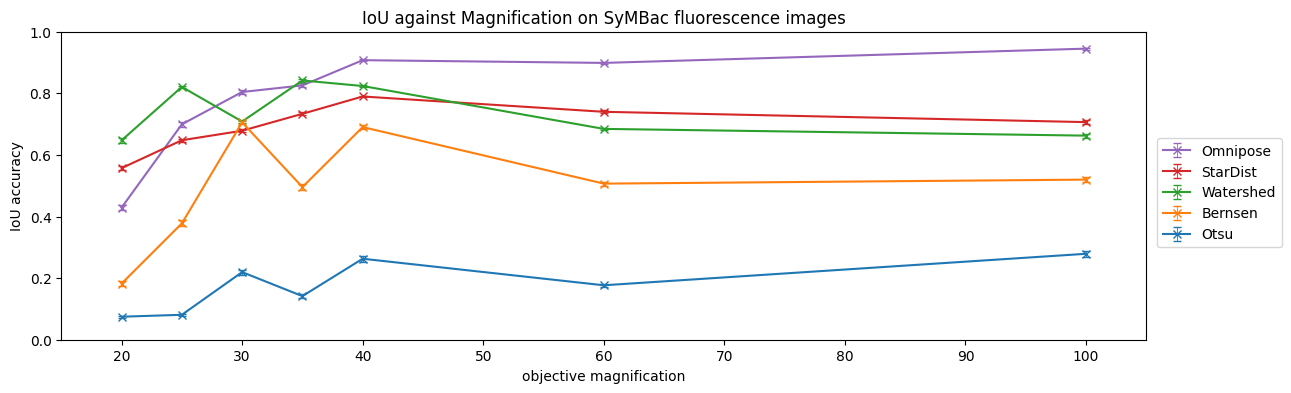

In [48]:
fig,axs = plt.subplots(1,1,figsize=[14,4])
axs.errorbar(xx,yy5,yerr5,elinewidth=0.6,capsize=3,marker='x',label='Omnipose',color="C4")
axs.errorbar(xx,yy1,yerr1,elinewidth=0.6,capsize=3,marker='x',label='StarDist',color="C3")
axs.errorbar(xx,yy2,yerr2,elinewidth=0.6,capsize=3,marker='x',label='Watershed',color="C2")
axs.errorbar(xx,yy3,yerr3,elinewidth=0.6,capsize=3,marker='x',label='Bernsen',color="C1")
axs.errorbar(xx,yy4,yerr4,elinewidth=0.6,capsize=3,marker='x',label='Otsu',color="C0")
axs.set_title("IoU against Magnification on SyMBac fluorescence images")
axs.set_xlabel("objective magnification")
axs.set_ylabel("IoU accuracy")
axs.set_xlim(15,105)
axs.set_ylim(0,1)
axs.legend(loc=[1.01,0.3])
plt.savefig("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/report_images/fluo_iou_fig.pdf")
plt.show()

# divide stdev by sqrt(400-1) for error bars

In [55]:
def print_table(yy):
    print(f"{yy[0]:.3f} & {yy[1]:.3f} & {yy[2]:.3f} & {yy[3]:.3f} & {yy[4]:.3f} & {yy[5]:.3f} & {yy[6]:.3f} \\\\")

In [56]:
print_table(yy4)
print_table(yy3)
print_table(yy2)
print_table(yy1)
print_table(yy5)

0.075 & 0.081 & 0.220 & 0.142 & 0.263 & 0.177 & 0.279 \\
0.182 & 0.378 & 0.706 & 0.496 & 0.690 & 0.507 & 0.520 \\
0.647 & 0.821 & 0.708 & 0.842 & 0.824 & 0.684 & 0.663 \\
0.557 & 0.648 & 0.679 & 0.733 & 0.790 & 0.740 & 0.707 \\
0.429 & 0.699 & 0.804 & 0.826 & 0.908 & 0.899 & 0.945 \\


In [ ]:
from error_algorithms import centroid_distances
from error_algorithms import find_cell_info
from error_algorithms import ignore_duplicates
from scipy.spatial.distance import cdist

In [ ]:
# type: ignore
directory = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/omnipose_SyMBac_TD_fl/100x test"
maskid100 = []
omniid100 = []
starid100 = []
waterid100 = []
localid100 = []
otsuid100 = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open(directory+"/masks/test_"+str(i).zfill(5)+"_masks.png"))
    omni = np.array(Image.open(directory+"/omnipose segmentations/mask_"+str(i).zfill(5)+".png"))
    star = np.array(Image.open(directory+"/stardist/test_"+str(i).zfill(5)+"StarDist.tif"))
    water,_ = ndimage.label(tifffile.imread(directory+"/watershed/test_"+str(i).zfill(5)+"watershed.tif"),np.ones([3,3]))
    local,_ = ndimage.label(tifffile.imread(directory+"/bernsen/test_"+str(i).zfill(5)+"bernsen.tif"),np.ones([3,3]))
    otsu,_ = ndimage.label(tifffile.imread(directory+"/otsu/test_"+str(i).zfill(5)+"otsu.tif"),np.ones([3,3]))
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        omnij = omni[:,width*j:width*(j+1)]
        starj = star[:,width*j:width*(j+1)]
        waterj = water[:,width*j:width*(j+1)]
        localj = local[:,width*j:width*(j+1)]
        otsuj = otsu[:,width*j:width*(j+1)]
        maskid100.append(maskj)
        omniid100.append(omnij)
        starid100.append(starj)
        waterid100.append(waterj)
        localid100.append(localj)
        otsuid100.append(otsuj)
    # idlist.append(segmentation_accuracy(mask,[star,water,local,otsu],min_dist=mask.shape[1]//5,lb=0.5,ub=1/0.5))

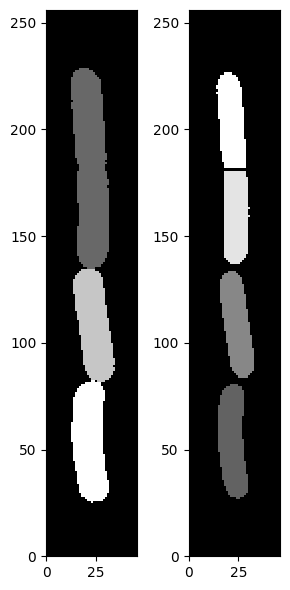

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(3,6))
axs[0].pcolor(maskid100[0],cmap="Greys_r")
axs[1].pcolor(waterid100[0],cmap="Greys_r")
fig.tight_layout()
plt.show()

In [ ]:
star_nearests, star_dists = [], []
omni_nearests, omni_dists = [], []
water_nearests, water_dists = [], []
local_nearests, local_dists = [], []
otsu_nearests, otsu_dists = [], []
for i, mask in enumerate(maskid100):
    star_nearest, star_dist = centroid_distances(mask,starid100[i])
    star_nearests.append(star_nearest)
    star_dists.append(star_dist)
    omni_nearest, omni_dist = centroid_distances(mask,omniid100[i])
    omni_nearests.append(omni_nearest)
    omni_dists.append(omni_dist)
    water_nearest, water_dist = centroid_distances(mask,waterid100[i])
    water_nearests.append(water_nearest)
    water_dists.append(water_dist)
    local_nearest, local_dist = centroid_distances(mask,localid100[i])
    local_nearests.append(local_nearest)
    local_dists.append(local_dist)
    otsu_nearest, otsu_dist = centroid_distances(mask,otsuid100[i])
    otsu_nearests.append(otsu_nearest)
    otsu_dists.append(otsu_dist)
# star_nearests = np.concatenate(star_nearests,axis=0)
# star_dists = np.hstack(star_dists)
# omni_nearests = np.concatenate(omni_nearests,axis=0)
# omni_dists = np.hstack(omni_dists)
# water_nearests = np.concatenate(water_nearests,axis=0)
# water_dists = np.hstack(water_dists)
# local_nearests = np.concatenate(local_nearests,axis=0)
# local_dists = np.hstack(local_dists)
# otsu_nearests = np.concatenate(otsu_nearests,axis=0)
# otsu_dists = np.hstack(otsu_dists)

In [ ]:
star_cells, star_dist, star_duplicates, star_indices = ignore_duplicates(star_nearests, star_dists)
omni_cells, omni_dist, omni_duplicates, omni_indices = ignore_duplicates(omni_nearests, omni_dists)
water_cells, water_dist, water_duplicates, water_indices = ignore_duplicates(water_nearests, water_dists)
local_cells, local_dist, local_duplicates, local_indices = ignore_duplicates(local_nearests, local_dists)
otsu_cells, otsu_dist, otsu_duplicates, otsu_indices = ignore_duplicates(otsu_nearests, otsu_dists)

In [ ]:
star_distances100 = np.append(star_dist, [np.max(star_dist)]*star_duplicates)
omni_distances100 = np.append(omni_dist, [np.max(omni_dist)]*omni_duplicates)
water_distances100 = np.append(water_dist, [np.max(water_dist)]*water_duplicates)
local_distances100 = np.append(local_dist, [np.max(local_dist)]*local_duplicates)
otsu_distances100 = np.append(otsu_dist, [np.max(otsu_dist)]*otsu_duplicates)

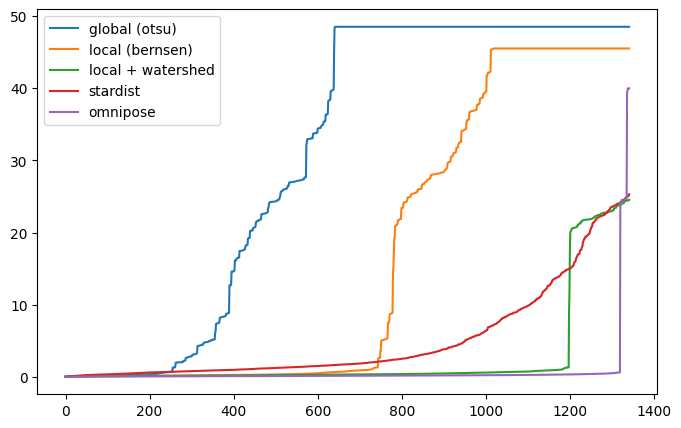

In [ ]:
plt.rcParams["figure.figsize"] = [8,5]
plt.plot(np.sort(otsu_distances100),label="global (otsu)")
plt.plot(np.sort(local_distances100),label="local (bernsen)")
plt.plot(np.sort(water_distances100),label="local + watershed")
plt.plot(np.sort(star_distances100),label="stardist")
plt.plot(np.sort(omni_distances100),label="omnipose")
plt.legend()
plt.show()

In [ ]:
# fig, axs = plt.subplots(len(omni_indices),3,figsize=(6,65))
# for i, ind in enumerate(omni_indices):
#     thing1 = axs[i,0].pcolor(maskid100[ind][::-1],cmap="Greys_r")
#     thing2 = axs[i,1].pcolor(omniid100[ind][::-1],cmap="Greys_r")
#     thing3 = axs[i,2].pcolor((maskid100[ind] * omniid100[ind])[::-1],cmap="Greys_r")
#     plt.colorbar(thing1,ax=axs[i,0])
#     plt.colorbar(thing2,ax=axs[i,1])
#     plt.colorbar(thing3,ax=axs[i,2])
# fig.tight_layout()
# plt.show()

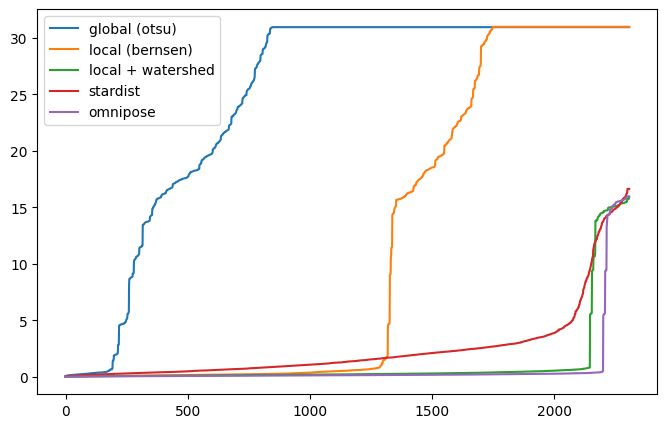

In [ ]:
# type: ignore
directory = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/omnipose_SyMBac_TD_fl/60x test"
maskid60 = []
omniid60 = []
starid60 = []
waterid60 = []
localid60 = []
otsuid60 = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open(directory+"/masks/test_"+str(i).zfill(5)+"_masks.png"))
    omni = np.array(Image.open(directory+"/omnipose segmentations/mask_"+str(i).zfill(5)+".png"))
    star = np.array(Image.open(directory+"/stardist/test_"+str(i).zfill(5)+"StarDist.tif"))
    water,_ = ndimage.label(tifffile.imread(directory+"/watershed/test_"+str(i).zfill(5)+"watershed.tif"),np.ones([3,3]))
    local,_ = ndimage.label(tifffile.imread(directory+"/bernsen/test_"+str(i).zfill(5)+"bernsen.tif"),np.ones([3,3]))
    otsu,_ = ndimage.label(tifffile.imread(directory+"/otsu/test_"+str(i).zfill(5)+"otsu.tif"),np.ones([3,3]))
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        omnij = omni[:,width*j:width*(j+1)]
        starj = star[:,width*j:width*(j+1)]
        waterj = water[:,width*j:width*(j+1)]
        localj = local[:,width*j:width*(j+1)]
        otsuj = otsu[:,width*j:width*(j+1)]
        maskid60.append(maskj)
        omniid60.append(omnij)
        starid60.append(starj)
        waterid60.append(waterj)
        localid60.append(localj)
        otsuid60.append(otsuj)

star_nearests, star_dists = [], []
omni_nearests, omni_dists = [], []
water_nearests, water_dists = [], []
local_nearests, local_dists = [], []
otsu_nearests, otsu_dists = [], []
for i, mask in enumerate(maskid60):
    star_nearest, star_dist = centroid_distances(mask,starid60[i])
    star_nearests.append(star_nearest)
    star_dists.append(star_dist)
    omni_nearest, omni_dist = centroid_distances(mask,omniid60[i])
    omni_nearests.append(omni_nearest)
    omni_dists.append(omni_dist)
    water_nearest, water_dist = centroid_distances(mask,waterid60[i])
    water_nearests.append(water_nearest)
    water_dists.append(water_dist)
    local_nearest, local_dist = centroid_distances(mask,localid60[i])
    local_nearests.append(local_nearest)
    local_dists.append(local_dist)
    otsu_nearest, otsu_dist = centroid_distances(mask,otsuid60[i])
    otsu_nearests.append(otsu_nearest)
    otsu_dists.append(otsu_dist)

star_cells, star_dist, star_duplicates, star_indices = ignore_duplicates(star_nearests, star_dists)
omni_cells, omni_dist, omni_duplicates, omni_indices = ignore_duplicates(omni_nearests, omni_dists)
water_cells, water_dist, water_duplicates, water_indices = ignore_duplicates(water_nearests, water_dists)
local_cells, local_dist, local_duplicates, local_indices = ignore_duplicates(local_nearests, local_dists)
otsu_cells, otsu_dist, otsu_duplicates, otsu_indices = ignore_duplicates(otsu_nearests, otsu_dists)

star_distances60 = np.append(star_dist, [np.max(star_dist)]*star_duplicates)
omni_distances60 = np.append(omni_dist, [np.max(omni_dist)]*omni_duplicates)
water_distances60 = np.append(water_dist, [np.max(water_dist)]*water_duplicates)
local_distances60 = np.append(local_dist, [np.max(local_dist)]*local_duplicates)
otsu_distances60 = np.append(otsu_dist, [np.max(otsu_dist)]*otsu_duplicates)

plt.plot(np.sort(otsu_distances60),label="global (otsu)")
plt.plot(np.sort(local_distances60),label="local (bernsen)")
plt.plot(np.sort(water_distances60),label="local + watershed")
plt.plot(np.sort(star_distances60),label="stardist")
plt.plot(np.sort(omni_distances60),label="omnipose")
plt.legend()
plt.show()

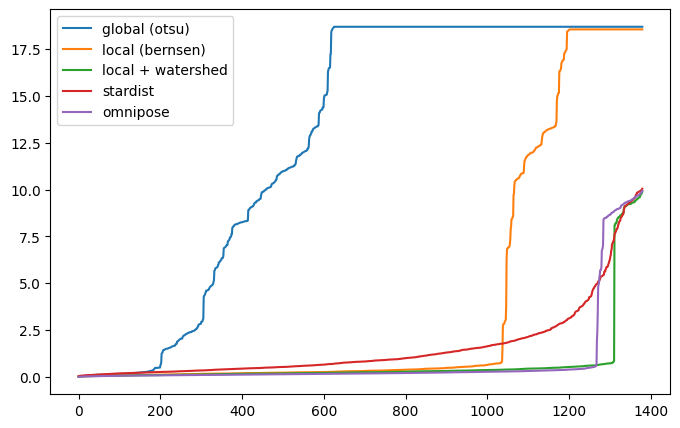

In [ ]:
# type: ignore
directory = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/omnipose_SyMBac_TD_fl/40x test"
maskid40 = []
omniid40 = []
starid40 = []
waterid40 = []
localid40 = []
otsuid40 = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open(directory+"/masks/test_"+str(i).zfill(5)+"_masks.png"))
    omni = np.array(Image.open(directory+"/omnipose segmentations/mask_"+str(i).zfill(5)+".png"))
    star = np.array(Image.open(directory+"/stardist/test_"+str(i).zfill(5)+"StarDist.tif"))
    water,_ = ndimage.label(tifffile.imread(directory+"/watershed/test_"+str(i).zfill(5)+"watershed.tif"),np.ones([3,3]))
    local,_ = ndimage.label(tifffile.imread(directory+"/bernsen/test_"+str(i).zfill(5)+"bernsen.tif"),np.ones([3,3]))
    otsu,_ = ndimage.label(tifffile.imread(directory+"/otsu/test_"+str(i).zfill(5)+"otsu.tif"),np.ones([3,3]))
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        omnij = omni[:,width*j:width*(j+1)]
        starj = star[:,width*j:width*(j+1)]
        waterj = water[:,width*j:width*(j+1)]
        localj = local[:,width*j:width*(j+1)]
        otsuj = otsu[:,width*j:width*(j+1)]
        maskid40.append(maskj)
        omniid40.append(omnij)
        starid40.append(starj)
        waterid40.append(waterj)
        localid40.append(localj)
        otsuid40.append(otsuj)

star_nearests, star_dists = [], []
omni_nearests, omni_dists = [], []
water_nearests, water_dists = [], []
local_nearests, local_dists = [], []
otsu_nearests, otsu_dists = [], []
for i, mask in enumerate(maskid40):
    star_nearest, star_dist = centroid_distances(mask,starid40[i])
    star_nearests.append(star_nearest)
    star_dists.append(star_dist)
    omni_nearest, omni_dist = centroid_distances(mask,omniid40[i])
    omni_nearests.append(omni_nearest)
    omni_dists.append(omni_dist)
    water_nearest, water_dist = centroid_distances(mask,waterid40[i])
    water_nearests.append(water_nearest)
    water_dists.append(water_dist)
    local_nearest, local_dist = centroid_distances(mask,localid40[i])
    local_nearests.append(local_nearest)
    local_dists.append(local_dist)
    otsu_nearest, otsu_dist = centroid_distances(mask,otsuid40[i])
    otsu_nearests.append(otsu_nearest)
    otsu_dists.append(otsu_dist)

star_cells, star_dist, star_duplicates, star_indices = ignore_duplicates(star_nearests, star_dists)
omni_cells, omni_dist, omni_duplicates, omni_indices = ignore_duplicates(omni_nearests, omni_dists)
water_cells, water_dist, water_duplicates, water_indices = ignore_duplicates(water_nearests, water_dists)
local_cells, local_dist, local_duplicates, local_indices = ignore_duplicates(local_nearests, local_dists)
otsu_cells, otsu_dist, otsu_duplicates, otsu_indices = ignore_duplicates(otsu_nearests, otsu_dists)

star_distances40 = np.append(star_dist, [np.max(star_dist)]*star_duplicates)
omni_distances40 = np.append(omni_dist, [np.max(omni_dist)]*omni_duplicates)
water_distances40 = np.append(water_dist, [np.max(water_dist)]*water_duplicates)
local_distances40 = np.append(local_dist, [np.max(local_dist)]*local_duplicates)
otsu_distances40 = np.append(otsu_dist, [np.max(otsu_dist)]*otsu_duplicates)

plt.plot(np.sort(otsu_distances40),label="global (otsu)")
plt.plot(np.sort(local_distances40),label="local (bernsen)")
plt.plot(np.sort(water_distances40),label="local + watershed")
plt.plot(np.sort(star_distances40),label="stardist")
plt.plot(np.sort(omni_distances40),label="omnipose")
plt.legend()
plt.show()

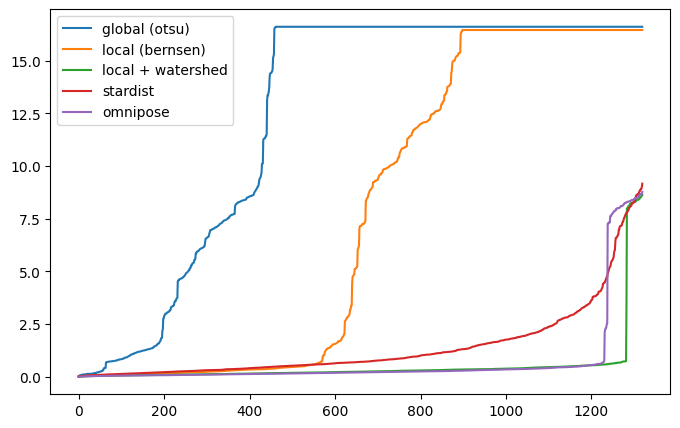

In [ ]:
# type: ignore
directory = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/omnipose_SyMBac_TD_fl/35x test"
maskid35 = []
omniid35 = []
starid35 = []
waterid35 = []
localid35 = []
otsuid35 = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open(directory+"/masks/test_"+str(i).zfill(5)+"_masks.png"))
    omni = np.array(Image.open(directory+"/omnipose segmentations/mask_"+str(i).zfill(5)+".png"))
    star = np.array(Image.open(directory+"/stardist/test_"+str(i).zfill(5)+"StarDist.tif"))
    water,_ = ndimage.label(tifffile.imread(directory+"/watershed/test_"+str(i).zfill(5)+"watershed.tif"),np.ones([3,3]))
    local,_ = ndimage.label(tifffile.imread(directory+"/bernsen/test_"+str(i).zfill(5)+"bernsen.tif"),np.ones([3,3]))
    otsu,_ = ndimage.label(tifffile.imread(directory+"/otsu/test_"+str(i).zfill(5)+"otsu.tif"),np.ones([3,3]))
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        omnij = omni[:,width*j:width*(j+1)]
        starj = star[:,width*j:width*(j+1)]
        waterj = water[:,width*j:width*(j+1)]
        localj = local[:,width*j:width*(j+1)]
        otsuj = otsu[:,width*j:width*(j+1)]
        maskid35.append(maskj)
        omniid35.append(omnij)
        starid35.append(starj)
        waterid35.append(waterj)
        localid35.append(localj)
        otsuid35.append(otsuj)

star_nearests, star_dists = [], []
omni_nearests, omni_dists = [], []
water_nearests, water_dists = [], []
local_nearests, local_dists = [], []
otsu_nearests, otsu_dists = [], []
for i, mask in enumerate(maskid35):
    star_nearest, star_dist = centroid_distances(mask,starid35[i])
    star_nearests.append(star_nearest)
    star_dists.append(star_dist)
    omni_nearest, omni_dist = centroid_distances(mask,omniid35[i])
    omni_nearests.append(omni_nearest)
    omni_dists.append(omni_dist)
    water_nearest, water_dist = centroid_distances(mask,waterid35[i])
    water_nearests.append(water_nearest)
    water_dists.append(water_dist)
    local_nearest, local_dist = centroid_distances(mask,localid35[i])
    local_nearests.append(local_nearest)
    local_dists.append(local_dist)
    otsu_nearest, otsu_dist = centroid_distances(mask,otsuid35[i])
    otsu_nearests.append(otsu_nearest)
    otsu_dists.append(otsu_dist)

star_cells, star_dist, star_duplicates, star_indices = ignore_duplicates(star_nearests, star_dists)
omni_cells, omni_dist, omni_duplicates, omni_indices = ignore_duplicates(omni_nearests, omni_dists)
water_cells, water_dist, water_duplicates, water_indices = ignore_duplicates(water_nearests, water_dists)
local_cells, local_dist, local_duplicates, local_indices = ignore_duplicates(local_nearests, local_dists)
otsu_cells, otsu_dist, otsu_duplicates, otsu_indices = ignore_duplicates(otsu_nearests, otsu_dists)

star_distances35 = np.append(star_dist, [np.max(star_dist)]*star_duplicates)
omni_distances35 = np.append(omni_dist, [np.max(omni_dist)]*omni_duplicates)
water_distances35 = np.append(water_dist, [np.max(water_dist)]*water_duplicates)
local_distances35 = np.append(local_dist, [np.max(local_dist)]*local_duplicates)
otsu_distances35 = np.append(otsu_dist, [np.max(otsu_dist)]*otsu_duplicates)

plt.plot(np.sort(otsu_distances35),label="global (otsu)")
plt.plot(np.sort(local_distances35),label="local (bernsen)")
plt.plot(np.sort(water_distances35),label="local + watershed")
plt.plot(np.sort(star_distances35),label="stardist")
plt.plot(np.sort(omni_distances35),label="omnipose")
plt.legend()
plt.show()

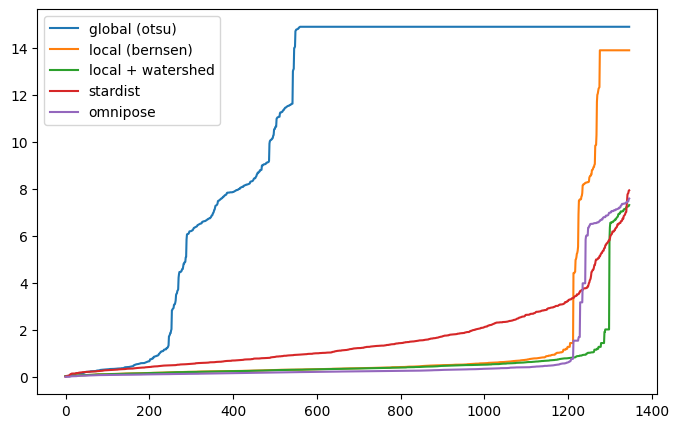

In [ ]:
# type: ignore
directory = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/omnipose_SyMBac_TD_fl/30x test"
maskid30 = []
omniid30 = []
starid30 = []
waterid30 = []
localid30 = []
otsuid30 = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open(directory+"/masks/test_"+str(i).zfill(5)+"_masks.png"))
    omni = np.array(Image.open(directory+"/omnipose segmentations/mask_"+str(i).zfill(5)+".png"))
    star = np.array(Image.open(directory+"/stardist/test_"+str(i).zfill(5)+"StarDist.tif"))
    water,_ = ndimage.label(tifffile.imread(directory+"/watershed/test_"+str(i).zfill(5)+"watershed.tif"),np.ones([3,3]))
    local,_ = ndimage.label(tifffile.imread(directory+"/bernsen/test_"+str(i).zfill(5)+"bernsen.tif"),np.ones([3,3]))
    otsu,_ = ndimage.label(tifffile.imread(directory+"/otsu/test_"+str(i).zfill(5)+"otsu.tif"),np.ones([3,3]))
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        omnij = omni[:,width*j:width*(j+1)]
        starj = star[:,width*j:width*(j+1)]
        waterj = water[:,width*j:width*(j+1)]
        localj = local[:,width*j:width*(j+1)]
        otsuj = otsu[:,width*j:width*(j+1)]
        maskid30.append(maskj)
        omniid30.append(omnij)
        starid30.append(starj)
        waterid30.append(waterj)
        localid30.append(localj)
        otsuid30.append(otsuj)

star_nearests, star_dists = [], []
omni_nearests, omni_dists = [], []
water_nearests, water_dists = [], []
local_nearests, local_dists = [], []
otsu_nearests, otsu_dists = [], []
for i, mask in enumerate(maskid30):
    star_nearest, star_dist = centroid_distances(mask,starid30[i])
    star_nearests.append(star_nearest)
    star_dists.append(star_dist)
    omni_nearest, omni_dist = centroid_distances(mask,omniid30[i])
    omni_nearests.append(omni_nearest)
    omni_dists.append(omni_dist)
    water_nearest, water_dist = centroid_distances(mask,waterid30[i])
    water_nearests.append(water_nearest)
    water_dists.append(water_dist)
    local_nearest, local_dist = centroid_distances(mask,localid30[i])
    local_nearests.append(local_nearest)
    local_dists.append(local_dist)
    otsu_nearest, otsu_dist = centroid_distances(mask,otsuid30[i])
    otsu_nearests.append(otsu_nearest)
    otsu_dists.append(otsu_dist)

star_cells, star_dist, star_duplicates, star_indices = ignore_duplicates(star_nearests, star_dists)
omni_cells, omni_dist, omni_duplicates, omni_indices = ignore_duplicates(omni_nearests, omni_dists)
water_cells, water_dist, water_duplicates, water_indices = ignore_duplicates(water_nearests, water_dists)
local_cells, local_dist, local_duplicates, local_indices = ignore_duplicates(local_nearests, local_dists)
otsu_cells, otsu_dist, otsu_duplicates, otsu_indices = ignore_duplicates(otsu_nearests, otsu_dists)

star_distances30 = np.append(star_dist, [np.max(star_dist)]*star_duplicates)
omni_distances30 = np.append(omni_dist, [np.max(omni_dist)]*omni_duplicates)
water_distances30 = np.append(water_dist, [np.max(water_dist)]*water_duplicates)
local_distances30 = np.append(local_dist, [np.max(local_dist)]*local_duplicates)
otsu_distances30 = np.append(otsu_dist, [np.max(otsu_dist)]*otsu_duplicates)

plt.plot(np.sort(otsu_distances30),label="global (otsu)")
plt.plot(np.sort(local_distances30),label="local (bernsen)")
plt.plot(np.sort(water_distances30),label="local + watershed")
plt.plot(np.sort(star_distances30),label="stardist")
plt.plot(np.sort(omni_distances30),label="omnipose")
plt.legend()
plt.show()

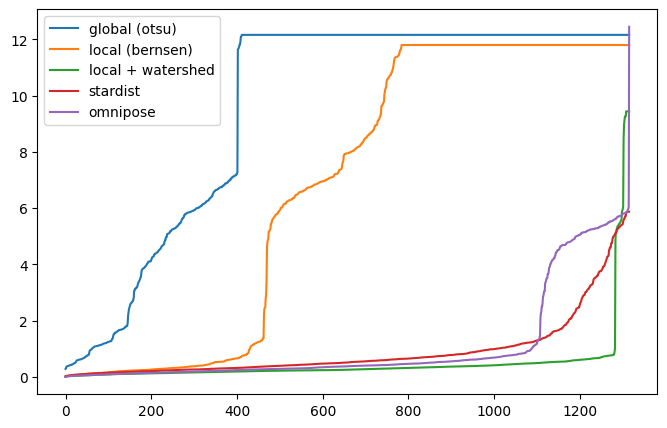

In [ ]:
# type: ignore
directory = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/omnipose_SyMBac_TD_fl/25x test"
maskid25 = []
omniid25 = []
starid25 = []
waterid25 = []
localid25 = []
otsuid25 = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open(directory+"/masks/test_"+str(i).zfill(5)+"_masks.png"))
    omni = np.array(Image.open(directory+"/omnipose segmentations/mask_"+str(i).zfill(5)+".png"))
    star = np.array(Image.open(directory+"/stardist/test_"+str(i).zfill(5)+"StarDist.tif"))
    water,_ = ndimage.label(tifffile.imread(directory+"/watershed/test_"+str(i).zfill(5)+"watershed.tif"),np.ones([3,3]))
    local,_ = ndimage.label(tifffile.imread(directory+"/bernsen/test_"+str(i).zfill(5)+"bernsen.tif"),np.ones([3,3]))
    otsu,_ = ndimage.label(tifffile.imread(directory+"/otsu/test_"+str(i).zfill(5)+"otsu.tif"),np.ones([3,3]))
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        omnij = omni[:,width*j:width*(j+1)]
        starj = star[:,width*j:width*(j+1)]
        waterj = water[:,width*j:width*(j+1)]
        localj = local[:,width*j:width*(j+1)]
        otsuj = otsu[:,width*j:width*(j+1)]
        maskid25.append(maskj)
        omniid25.append(omnij)
        starid25.append(starj)
        waterid25.append(waterj)
        localid25.append(localj)
        otsuid25.append(otsuj)

star_nearests, star_dists = [], []
omni_nearests, omni_dists = [], []
water_nearests, water_dists = [], []
local_nearests, local_dists = [], []
otsu_nearests, otsu_dists = [], []
for i, mask in enumerate(maskid25):
    star_nearest, star_dist = centroid_distances(mask,starid25[i])
    star_nearests.append(star_nearest)
    star_dists.append(star_dist)
    omni_nearest, omni_dist = centroid_distances(mask,omniid25[i])
    omni_nearests.append(omni_nearest)
    omni_dists.append(omni_dist)
    water_nearest, water_dist = centroid_distances(mask,waterid25[i])
    water_nearests.append(water_nearest)
    water_dists.append(water_dist)
    local_nearest, local_dist = centroid_distances(mask,localid25[i])
    local_nearests.append(local_nearest)
    local_dists.append(local_dist)
    otsu_nearest, otsu_dist = centroid_distances(mask,otsuid25[i])
    otsu_nearests.append(otsu_nearest)
    otsu_dists.append(otsu_dist)

star_cells, star_dist, star_duplicates, star_indices = ignore_duplicates(star_nearests, star_dists)
omni_cells, omni_dist, omni_duplicates, omni_indices = ignore_duplicates(omni_nearests, omni_dists)
water_cells, water_dist, water_duplicates, water_indices = ignore_duplicates(water_nearests, water_dists)
local_cells, local_dist, local_duplicates, local_indices = ignore_duplicates(local_nearests, local_dists)
otsu_cells, otsu_dist, otsu_duplicates, otsu_indices = ignore_duplicates(otsu_nearests, otsu_dists)

star_distances25 = np.append(star_dist, [np.max(star_dist)]*star_duplicates)
omni_distances25 = np.append(omni_dist, [np.max(omni_dist)]*omni_duplicates)
water_distances25 = np.append(water_dist, [np.max(water_dist)]*water_duplicates)
local_distances25 = np.append(local_dist, [np.max(local_dist)]*local_duplicates)
otsu_distances25 = np.append(otsu_dist, [np.max(otsu_dist)]*otsu_duplicates)

plt.plot(np.sort(otsu_distances25),label="global (otsu)")
plt.plot(np.sort(local_distances25),label="local (bernsen)")
plt.plot(np.sort(water_distances25),label="local + watershed")
plt.plot(np.sort(star_distances25),label="stardist")
plt.plot(np.sort(omni_distances25),label="omnipose")
plt.legend()
plt.show()

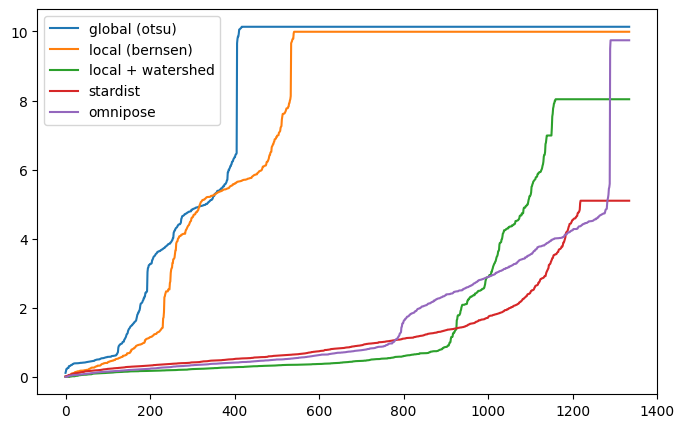

In [ ]:
# type: ignore
directory = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/omnipose_SyMBac_TD_fl/20x test"
maskid20 = []
omniid20 = []
starid20 = []
waterid20 = []
localid20 = []
otsuid20 = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open(directory+"/masks/test_"+str(i).zfill(5)+"_masks.png"))
    omni = np.array(Image.open(directory+"/omnipose segmentations/mask_"+str(i).zfill(5)+".png"))
    star = np.array(Image.open(directory+"/stardist/test_"+str(i).zfill(5)+"StarDist.tif"))
    water,_ = ndimage.label(tifffile.imread(directory+"/watershed/test_"+str(i).zfill(5)+"watershed.tif"),np.ones([3,3]))
    local,_ = ndimage.label(tifffile.imread(directory+"/bernsen/test_"+str(i).zfill(5)+"bernsen.tif"),np.ones([3,3]))
    otsu,_ = ndimage.label(tifffile.imread(directory+"/otsu/test_"+str(i).zfill(5)+"otsu.tif"),np.ones([3,3]))
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        omnij = omni[:,width*j:width*(j+1)]
        starj = star[:,width*j:width*(j+1)]
        waterj = water[:,width*j:width*(j+1)]
        localj = local[:,width*j:width*(j+1)]
        otsuj = otsu[:,width*j:width*(j+1)]
        maskid20.append(maskj)
        omniid20.append(omnij)
        starid20.append(starj)
        waterid20.append(waterj)
        localid20.append(localj)
        otsuid20.append(otsuj)

star_nearests, star_dists = [], []
omni_nearests, omni_dists = [], []
water_nearests, water_dists = [], []
local_nearests, local_dists = [], []
otsu_nearests, otsu_dists = [], []
for i, mask in enumerate(maskid20):
    star_nearest, star_dist = centroid_distances(mask,starid20[i])
    star_nearests.append(star_nearest)
    star_dists.append(star_dist)
    omni_nearest, omni_dist = centroid_distances(mask,omniid20[i])
    omni_nearests.append(omni_nearest)
    omni_dists.append(omni_dist)
    water_nearest, water_dist = centroid_distances(mask,waterid20[i])
    water_nearests.append(water_nearest)
    water_dists.append(water_dist)
    local_nearest, local_dist = centroid_distances(mask,localid20[i])
    local_nearests.append(local_nearest)
    local_dists.append(local_dist)
    otsu_nearest, otsu_dist = centroid_distances(mask,otsuid20[i])
    otsu_nearests.append(otsu_nearest)
    otsu_dists.append(otsu_dist)

star_cells, star_dist, star_duplicates, star_indices = ignore_duplicates(star_nearests, star_dists)
omni_cells, omni_dist, omni_duplicates, omni_indices = ignore_duplicates(omni_nearests, omni_dists)
water_cells, water_dist, water_duplicates, water_indices = ignore_duplicates(water_nearests, water_dists)
local_cells, local_dist, local_duplicates, local_indices = ignore_duplicates(local_nearests, local_dists)
otsu_cells, otsu_dist, otsu_duplicates, otsu_indices = ignore_duplicates(otsu_nearests, otsu_dists)

star_distances20 = np.append(star_dist, [np.max(star_dist)]*star_duplicates)
omni_distances20 = np.append(omni_dist, [np.max(omni_dist)]*omni_duplicates)
water_distances20 = np.append(water_dist, [np.max(water_dist)]*water_duplicates)
local_distances20 = np.append(local_dist, [np.max(local_dist)]*local_duplicates)
otsu_distances20 = np.append(otsu_dist, [np.max(otsu_dist)]*otsu_duplicates)

plt.plot(np.sort(otsu_distances20),label="global (otsu)")
plt.plot(np.sort(local_distances20),label="local (bernsen)")
plt.plot(np.sort(water_distances20),label="local + watershed")
plt.plot(np.sort(star_distances20),label="stardist")
plt.plot(np.sort(omni_distances20),label="omnipose")
plt.legend()
plt.show()

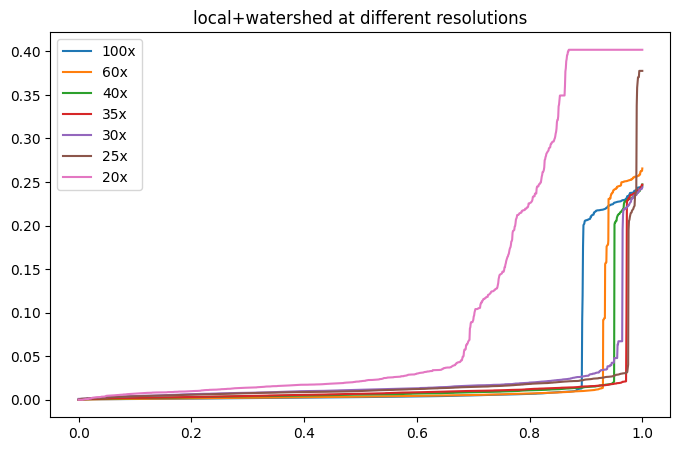

In [ ]:
plt.plot(np.linspace(0,1,len(water_distances100)),np.sort(water_distances100)/100,label="100x")
plt.plot(np.linspace(0,1,len(water_distances60)),np.sort(water_distances60)/60,label="60x")
plt.plot(np.linspace(0,1,len(water_distances40)),np.sort(water_distances40)/40,label="40x")
plt.plot(np.linspace(0,1,len(water_distances35)),np.sort(water_distances35)/35,label="35x")
plt.plot(np.linspace(0,1,len(water_distances30)),np.sort(water_distances30)/30,label="30x")
plt.plot(np.linspace(0,1,len(water_distances25)),np.sort(water_distances25)/25,label="25x")
plt.plot(np.linspace(0,1,len(water_distances20)),np.sort(water_distances20)/20,label="20x")
plt.title("local+watershed at different resolutions")
plt.legend()
plt.show()

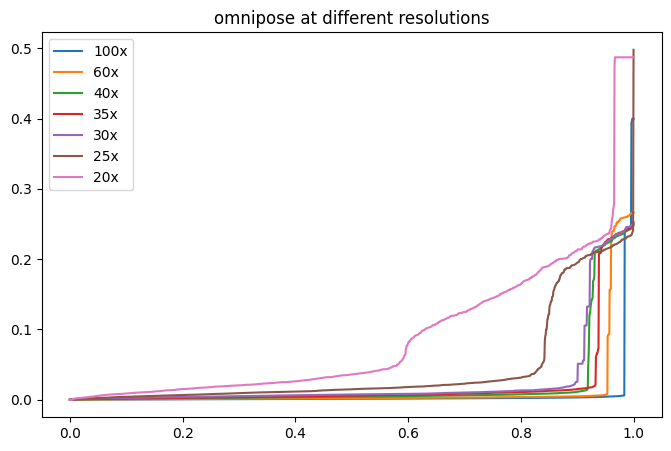

In [ ]:
plt.plot(np.linspace(0,1,len(omni_distances100)),np.sort(omni_distances100)/100,label="100x")
plt.plot(np.linspace(0,1,len(omni_distances60)), np.sort(omni_distances60)/60,label="60x")
plt.plot(np.linspace(0,1,len(omni_distances40)), np.sort(omni_distances40)/40,label="40x")
plt.plot(np.linspace(0,1,len(omni_distances35)), np.sort(omni_distances35)/35,label="35x")
plt.plot(np.linspace(0,1,len(omni_distances30)), np.sort(omni_distances30)/30,label="30x")
plt.plot(np.linspace(0,1,len(omni_distances25)), np.sort(omni_distances25)/25,label="25x")
plt.plot(np.linspace(0,1,len(omni_distances20)), np.sort(omni_distances20)/20,label="20x")
plt.title("omnipose at different resolutions")
plt.legend()
plt.show()

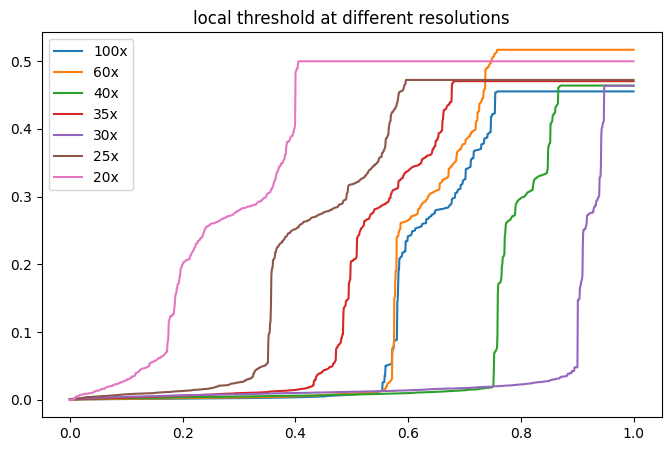

In [ ]:
plt.plot(np.linspace(0,1,len(local_distances100)),np.sort(local_distances100)/100,label="100x")
plt.plot(np.linspace(0,1,len(local_distances60)), np.sort(local_distances60)/60,label="60x")
plt.plot(np.linspace(0,1,len(local_distances40)), np.sort(local_distances40)/40,label="40x")
plt.plot(np.linspace(0,1,len(local_distances35)), np.sort(local_distances35)/35,label="35x")
plt.plot(np.linspace(0,1,len(local_distances30)), np.sort(local_distances30)/30,label="30x")
plt.plot(np.linspace(0,1,len(local_distances25)), np.sort(local_distances25)/25,label="25x")
plt.plot(np.linspace(0,1,len(local_distances20)), np.sort(local_distances20)/20,label="20x")
plt.title("local threshold at different resolutions")
plt.legend()
plt.show()

In [ ]:
# ensure it only carries from same trench

In [ ]:
grounds = [[[50,25],[125,25],[200,25]],[[48,23],[100,27],[151,26],[203,24]],[[49,26],[125,24],[199,25]]]
guesses = [[[51,26],[126,24],[199,26]],[[74,24],[150,26],[204,24]],[[50,25],[124,24],[200,25]]]
nears, dists = [],[]
for ground, guess in zip(grounds, guesses):
    dist = cdist(ground, guess)
    nears.append(np.array(guess)[np.argmin(dist,axis=-1)])
    dists.append(np.min(dist,axis=-1))
cells, distances, num_duplicates, indices = ignore_duplicates(nears, dists)

In [ ]:
cells, distances, num_duplicates, indices

(array([[ 51,  26],
        [126,  24],
        [199,  26],
        [ 74,  24],
        [150,  26],
        [204,  24],
        [ 50,  25],
        [124,  24],
        [200,  25]]),
 array([ 1.41421356,  1.41421356,  1.41421356, 26.01922366,  1.        ,
         1.        ,  1.41421356,  1.        ,  1.        ]),
 1,
 [1])